# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> GAURAV MAHADIK </font>

# Introduction

The aim of the assignment is to perform linear regression on a dataset to predict the volume of the diamond based on the dimensions of the diamond such as the carat weight , depth and others parameters present in the dataset. The features have been explained in the data section followed by the two methods which have been used to perform linear regression. Its followed by the experiements and conclusion of the assignment. The two methods used to perform Linear regression are Least Squares Method and Least Mean Squares Method expalined as follows:

Least Squares Method : The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems, i.e. sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the residuals made in the results of every single equation.The most important application is in data fitting. The best fit in the least-squares sense minimizes the sum of squared residuals (a residual being: the difference between an observed value, and the fitted value provided by a model).

Least Mean Sqaures Method : Least mean squares (LMS) algorithms are a class of adaptive filter used to mimic a desired filter by finding the filter coefficients that relate to producing the least mean square of the error signal (difference between the desired and the actual signal). It is a stochastic gradient descent method in that the filter is only adapted based on the error at the current time. It was invented in 1960 by Stanford University professor Bernard Widrow and his first Ph.D. student, Ted Hoff.

The dataset has been divided into two parts training and testing part and further as per the requirements of the above methods which can be seen ahead in the document.

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the regression data that you examined in Assignment #0. 

# Introduction of Diamond Dataset

This classic dataset contains the prices and other attributes of almost 54,000 diamonds along with 10 feature variables which 
are as follows: 

1.price- Price of the Diamonds(USD)

2.carat- Carat Weight of the Diamonds

3.cut - Quality of the cut that is Fair, Good, Very Good, Premium, Ideal

4.color- Color of the diamonds from J (worst) to D (best)

5.clarity- Clarity is a measurement of how clear the diamond is. Its from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

6.x - Length of the Diamonds in mm

7.y - Width of the Diamondsin mm

8.z - Depth of the Diamondsin mm

9.depth - Total depth percentage 2 * z / (x + y)

10.table - Width of top of diamond relative to widest point

#  Source of the Data

https://www.kaggle.com/shivam2503/diamonds

# Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Preprocessing the Data

In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0', 1)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Checking if the dataset contains any null values

In [7]:
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

As displayed above we can see that there are no null values in the selected dataset

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Calculating the Volume of the Diamond

In [9]:
df['volume'] = df['x']*df['y']*df['z']
data = df[df['volume']<1000]

In [10]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume'],
      dtype='object')

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [12]:
df.corr()

,carat,depth,table,price,x,y,z,volume
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
volume,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


# Visualization of the data

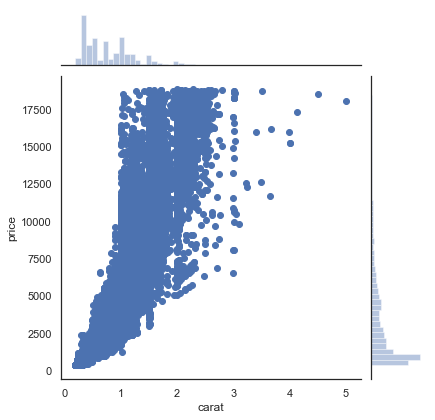

In [13]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(y="price", x="carat", data=df)

The Diamond Carat weight is varying exponentially with the Price of the diamond. Therefore higher the carat weight costlier is the diamond.

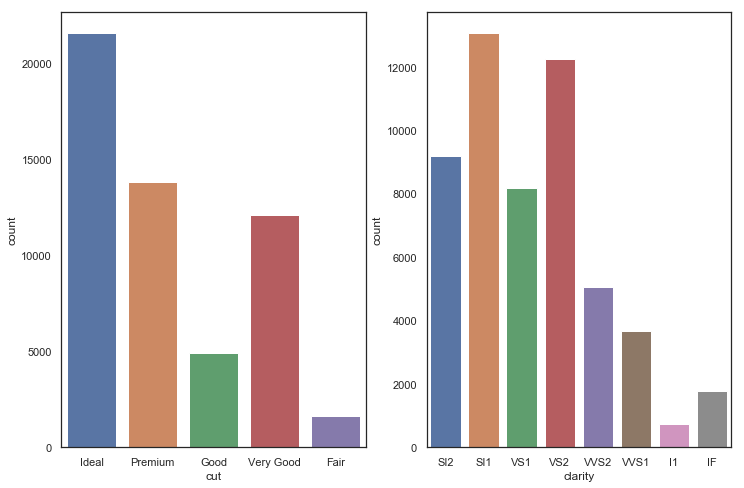

In [14]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.countplot(x= "cut", data=df,  orient='h' , ax=axes[0])
sns.countplot(x= "clarity", data=df,  orient='h' , ax=axes[1])

In the above graph we can see that there is a high frequency of diamonds having Ideal cut followed by Premium Cut followed by Very Good Cut.
Also we can observe that among the diamonds that we have in this dataset there is high number of diamonds having SI1 clarity followed by VS2 clarity.

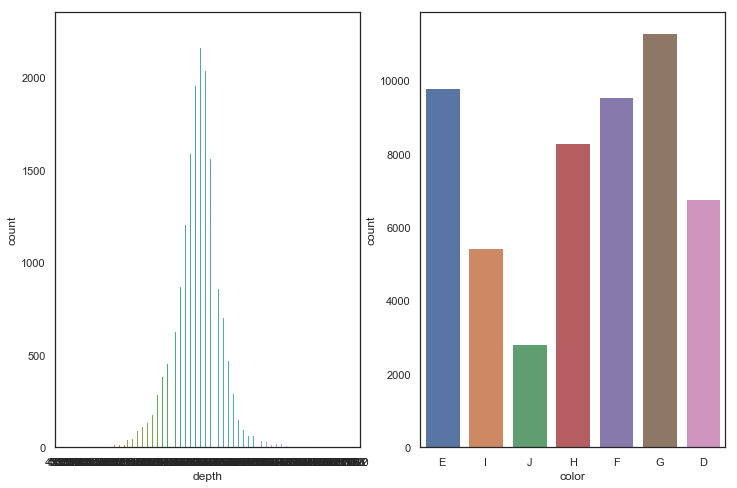

In [15]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.countplot(x= "depth", data=df,  orient='v' , ax=axes[0])
sns.countplot(x= "color", data=df,  orient='v' , ax=axes[1])

From the above graphs it can be seen that the diamond with color G has the highest frequency followed by the diamond with color E followed by the others.

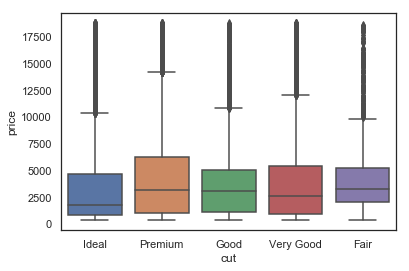

In [16]:
sns.boxplot(x='cut', y='price', data=df)

Premium Diamond Cut is the most expensive followed by very good cut.

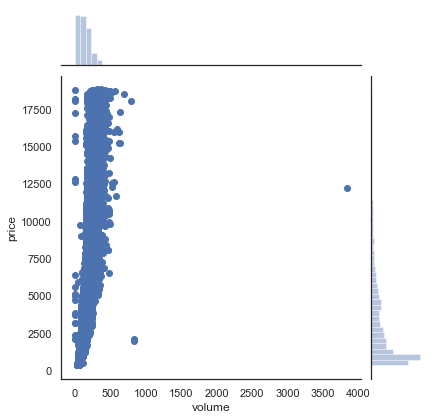

In [17]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="volume", y="price", data=df)

There is a kind of Linear Relationship between the Price and volume. As the volume is increasing the price of the diamonds is also increasing.

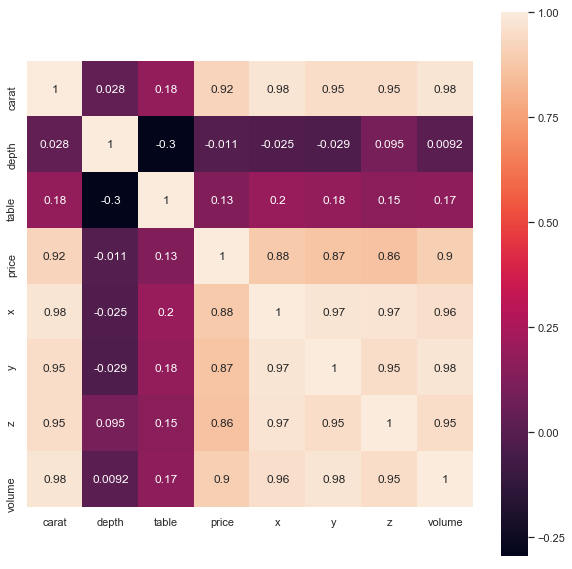

In [18]:
f = plt.subplots(figsize=(10, 10))
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

From the heat map we can observe that there is a neagtive corelation between depth and Price which states that as the depth of the diamond reduces the price of the Diamond increases as there is negative correlation between them.
It can be seen that there is a positive correltation between the price and the dimensions of the diamonds as well as with the volume of the Diamond.

# Preliminary Observations

After the analysis of the Dataset from the above visualization the following observations can be seen as follows

The Diamond Carat Weight is varying exponentially with the Diamond price.

There is a high frequency of diamonds having Ideal cut followed by Premium Cut followed by Very Good Cut.

It can be seen that in this dataset there is high number of diamonds having SI1 clarity followed by VS2 clarity.

It can be seen that the diamond with color G has the highest frequency followed by the diamond with color E followed by the others.

It can be seen that Premium Diamond Cut is the most expensive followed by very good cut.

There is a Linear Relationship between the Price of the Diamonds and the volume of the Diamonds.

There is neagtive corelation between depth and Price of the Diamonds and there is a positive correltation between the price and the dimensions of the diamonds as well as with the volume of the Diamond.

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


# Review of Linear Models(Least-squares and LMS)

Least Squares Model

Here we have the simplest of our regression methods, least squares. Least squares works by attempting to minimize the following function where we want to find the sum of differences between our predictions and their corresponding targets squared.

w∗=argminw∑i=1N(f(wi;w)−ti)2
w∗=arg⁡minw∑i=1N(f(wi;w)−ti)2
 
E(w)=w⊤X⊤Xw−2T⊤Xw+T⊤T
E(w)=w⊤X⊤Xw−2T⊤Xw+T⊤T
 
We minimize this function by taking its derivative and thus ending up with a function to update our weights with. Below is the function that we use to update our weights. We do this by feeding all our data at once into the function, also called offline learning. The issue with this method is that very large datasets can not be stored in memory and it is very expense to compute inverses. On the plus side, the theoretical work behind this function guarantees convergence.

w=(X⊤X)−1X⊤T
w=(X⊤X)−1X⊤T

Least Mean Squares Model

Here we have our other regression method, least mean squares. Least mean squares works by still attempting to minimize  our error but now we do it in a online fashion. This means that we update our weights after observing each individual data sample, not the whole dataset at once. The following function is the function we want to minimize, this time though we do not want to expand the error function (we want to immediately take the derivative).

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

$$
E_k = \frac{\partial E}{\partial w^{(k)}} = \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 
$$

$$
E_K = 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$
*Since w.T @ x gives us our prediction, we subsitute it for f(x,w).* <br>
When we take the derivative with respect to *w* we get the following function. The functions reads as the following: our current weight *w* minus the learning rate (size of our steps we take towards the minimum) multiplied by the difference between our prediction and target and then lastly multiplied by the data currently being observed. LMS is great but comes at a cost of potentially never converging.


$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

# Implementation and Description of the Models

### Super Classs Definition

In [19]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        
        #self.wght=None
        """
            weight vector w is initialized as None
        """
        

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

Explanation of Code of Super Class

As we can see in the above code the super class has been declared which contains the LinearModel which is the base model for the implementation of both the models i.e. Least Squares Model and Least Mean Square Model. 

The Linear model contains definition of functions like check_matrix and add_ones.

check_matrix function check whether or not the matrix passed to it is tw dimentional or not and if its not two dimentional then it raises a valueError Exception.

add_ones function adds a basis i.e. it adds a column basis to X which is the input matrix.

### Least Squares

In [20]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train least-squares model
    def train(self, X, T):
        N = X.shape[0]
        X1 = self.add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        return self.w
    
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = self.add_ones(X)
        y = X1 @ self.w
        
        return y

Explanation of the code of Least Square Model

We have implemented the Least Square Model which contains the LinearRegress class which extends LinearModel which is the base class explained in the Superclass model.

The LinearRegress class contains the definition for the functions train and use which perform function as their names suggest.

The train function trains the data according to the Least Square Method.

The use function applies the learned model to the dataset of the Diamonds.


# LMS

In [21]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    w = np.zeros([1,1])
    alpha = 0.001
    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        N = x.shape[0]
        X1 = np.hstack((np.ones(1),x))
        N = X1.shape[0]
        #print(self.w)
        if(len(self.w)!= N):
            self.w = np.zeros(N)
        y = self.w @ X1
        self.w -= self.alpha * (y - t) * X1
       
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        y = X1 @ self.w
        N = X1.shape[0]
        y.shape = (N,1)
        return y
        
        

Explanation of the code of Least Mean Square Model

We have implemented the Least Square Model which contains the LMS class which extends LinearModel which is the base class explained in the Superclass model.

The LMS class contains the definition for the functions train, trainstep and use which perform function as their names suggest.

In the train function the data is trained according to batch training by using train_step function.

As the name suggests the train_step function trains the data one step at a time. Here x is a one dimentional vector.

The use funtion applies the current model to the dataset of the Diamonds.

# Correct Implementation of Preliminary Test

In [22]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


Storing the feature variables in X and target variable that is the volume in T as follows:

In [23]:
X = df[['carat', 'depth', 'table','x', 'y','z']].copy()
T = df[['volume']].copy()

Sampling the dataset for 10000 values and splitting them into 8000 for training and 2000 for testing as follows:

In [24]:
#Splitting Dataset into Training and Testing Data
data = df.sample(10000)
training_data = data.iloc[:8000,:]
testing_data = data.iloc[8000:10000,:]

X_on_Train = X.iloc[:8000,:]
X_on_Test = X.iloc[8000:10000,:]
T_on_Train = T.iloc[:8000,:]
T_on_Test = T.iloc[8000:10000,:]


X_Train = np.array(X_on_Train)
X_Test = np.array(X_on_Test)

T_Train = np.array(T_on_Train)
T_Test = np.array(T_on_Test)

# Description, Codes

Least Square Method Experiment

To implement the Least Square Method Experiment we make an object of the LinearRegress class so as to use its methods i.e. train and use which have been used as follows:

In [25]:
lr = LinearRegress()
lr.train(X_Train,T_Train)
T_Predicted = lr.use(X_Test)

In [26]:
rmse(T_Test,T_Predicted)

116.75701472902625

# Visualization of the Results

Plotting the result store in T_Predicted as follows:

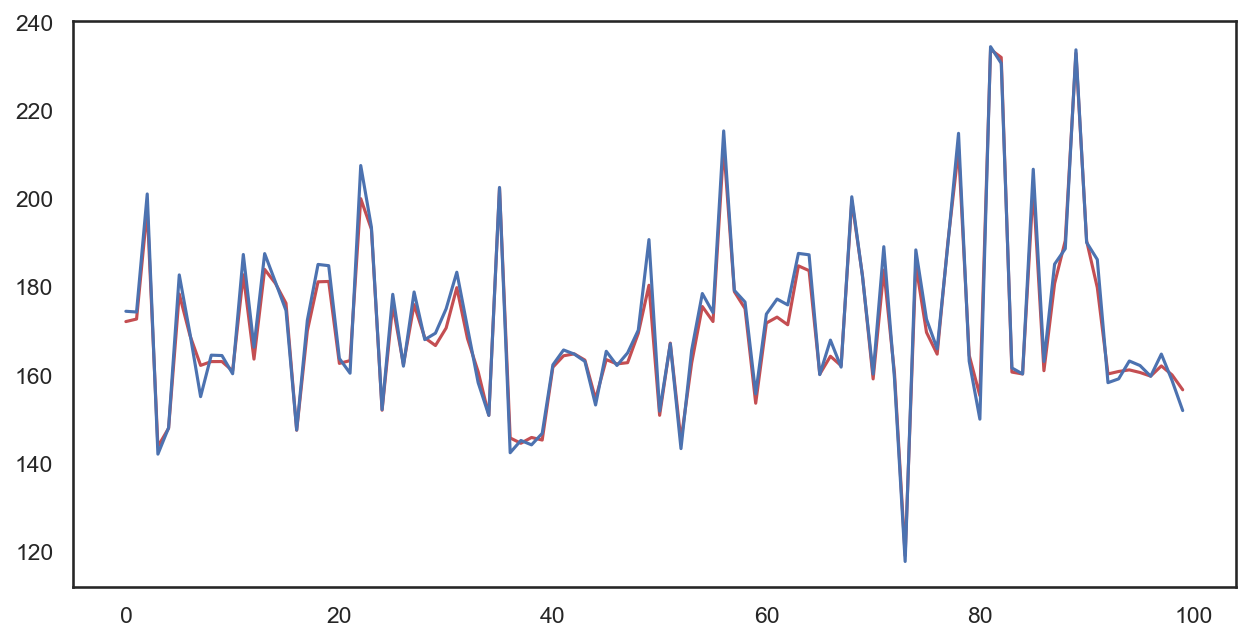

In [27]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(T_Predicted[1900:2000],'-r')
plt.plot(T_Test[1900:2000],'-b')
plt.show()

Analysis of Least Square Method Experiment

After performing the experiment of Least Square Method on the Diamonds Dataset we can see the plot of the predicted values of volume are really close to the test values of volume from the dataset.

The rmse error has been calculated above looks like a small number which tells us the the model is predicting the values which are very close to the test values from the dataset.

# Description, Codes

Least Mean Squares Method Experiment

To implement the Least Square Method Experiment we make an object of the LMS class so as to use its methods i.e. train and use which have been used as follows:

In [28]:
lms = LMS(0.00022)
lms.train(X_Train,T_Train)
T_Predict = lms.use(X_Test)

In [29]:
rmse(T_Test,T_Predict)

1200.052707417986

# Visualization of the Results

Plotting the result store in T_Predicted as follows:

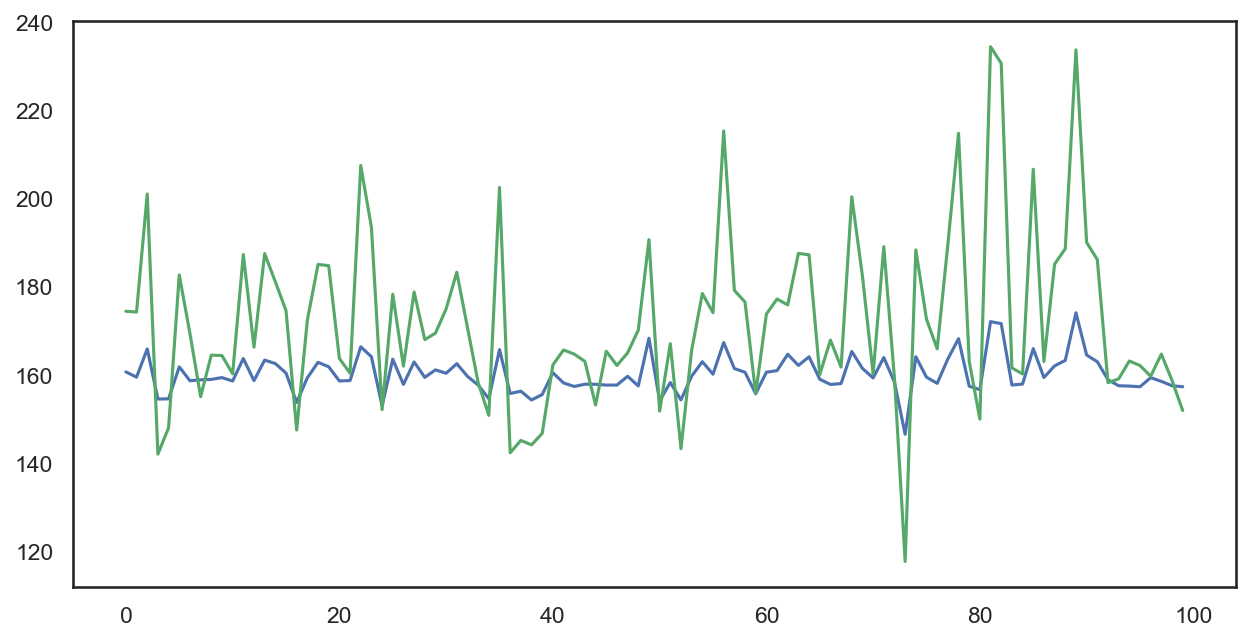

In [30]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(T_Predict[1900:2000],'-b')
plt.plot(T_Test[1900:2000],'-g')
plt.show()

Analysis of Least Mean Square Method Experiment

After performing Least Mean Square Method on the Diamonds dataset we can see the plot of predicted values of volume with the test values of volume from the dataset are as seen above in the plot.

The rmse error which has been calculated is comparatively high compared to the Least Square Method which tells us that the accuracy of the Least Mean Square model is not as much as the Least Sqaures Model.

# Analysis and Comparison

The plots of the Least Square Method and the Least Mean Square Method have been visualized above as we can see in above figures. The rmse error for Least Square Model (LS Model) is 116.75 and the rmse error for the Least Mean Square Model (LMS Model) is 1200.05. From the rmse errors we can say that the LS Model is more accurate compared to LMS Model. 

Least Square Method is exceedingly subject to the conveyance of the data.If information isn't normally distributed them rmse value will be very large.

Least Mean Square Method is highly dependent on the value of aplha.It is quiet difficult to find the exact value of alpha properly which can be used to train the LMS Model because the value of aplha is fixed using the trail and error method. In LMS we have to update the weights after every iteration which makes the calculation logic much more complex compared to LS Model.

In the Least Square Model we have to just work on one equation where as in the Least Mean Square Model we have to iteratively update the weight.


From the above observations, I can concurr that LS perform better than LMS. The learning rate is very influential in determining the accuracy of LMS. According to the theory LS is much simpler than LMS and the rmse error of LS Model is much smaller compared to LMS model. The calculation of LMS Model is more complex and gives less accuracy so LS is a better compared to LMS.

# Conclusions

In this assignment we have performed linear regression on the Diamonds Dataset using the Linear Square Method and Linear Mean Square Method. The Linear Mean Square Method is more complex due to greater depth and detail in its calculation compared to the Linear Square Model. In this dataset the learning rate was very low due to which the accuracy of LMS Model was low comapred to LS Model however if the learning rate is very high then probably LMS Model has the pottential to perform better than LS model.

# References



Black Friday Data. Retrieved from https://www.kaggle.com/mehdidag/black-friday

Diamonds Data. Retrieved from https://www.kaggle.com/shivam2503/diamonds

Matplotlib. Retrieved from https://matplotlib.org/

Seaborn. Retrieved from https://seaborn.pydata.org/ 

Wikipedia. Retrived from https://www.wikipedia.org/

Stackoverflow. Retrived from https://stackoverflow.com/

And More

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

What is the most and least signifcant features of your data ?

From the correlation matrix and heatmap that has been visualized in the Visualization part of Data subsection 

The most significant features to compute the volume of the diamond are
1.Carat
2. x
3. y
4. z

The most insiginificant features to compute the volume of the diamond are
1. Depth
2. Table

What are the consequences if you remove those features from the model? 

As depth and table are the most insignificant features as stated above removing them from the feature set should not affect the way the two models train the data.

In [31]:
X1 = df[['carat','x', 'y','z']].copy()
T1 = df[['volume']].copy()

In [32]:
#Splitting Dataset into Training and Testing Data
data = df.sample(10000)
training_data = data.iloc[:8000,:]
testing_data = data.iloc[8000:10000,:]

X1_on_Train = X1.iloc[:8000,:]
X1_on_Test = X1.iloc[8000:10000,:]
T1_on_Train = T1.iloc[:8000,:]
T1_on_Test = T1.iloc[8000:10000,:]


X1_Train = np.array(X1_on_Train)
X1_Test = np.array(X1_on_Test)

T1_Train = np.array(T1_on_Train)
T1_Test = np.array(T1_on_Test)

LS MODEL

In [33]:
lr = LinearRegress()
lr.train(X1_Train,T1_Train)
T1_Predicted = lr.use(X1_Test)

In [34]:
rmse(T1_Test,T1_Predicted)

176.55668258320432

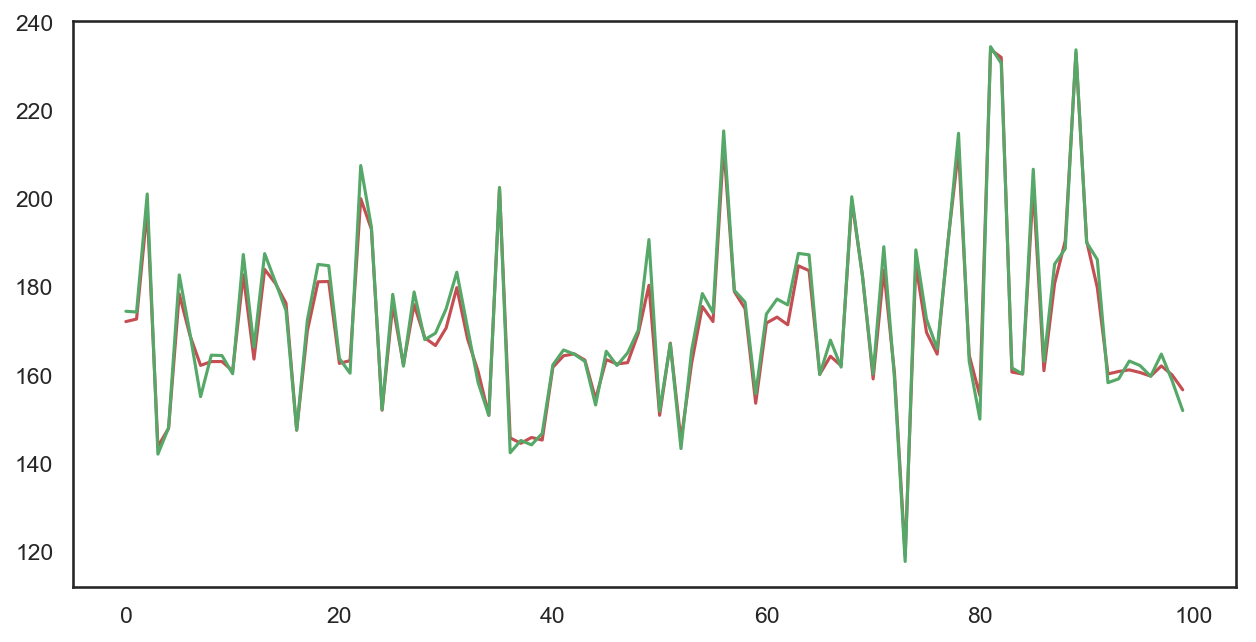

In [48]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(T_Predicted[1900:2000],'-r')
plt.plot(T_Test[1900:2000],'-g')
plt.show()

Analysis

I have considered carat,x,y,z to be the most significant feature and we can see that the graph is consistent as seen in the experiment section. So as per the correaltion matrix these are the most significant features.

However it can be seen that the rmse error is increasing. The possible explanation for this can be seen due to the deviations in the range of 18 to 27 and 55 to 70. Due to the devation in the data n these sections there is a slight increase in the error.



LMS Model

In [36]:
lms = LMS(0.00022)
lms.train(X1_Train,T1_Train)
T1_Predict = lms.use(X1_Test)

In [37]:
rmse(T1_Test,T1_Predict)

921.055248800201

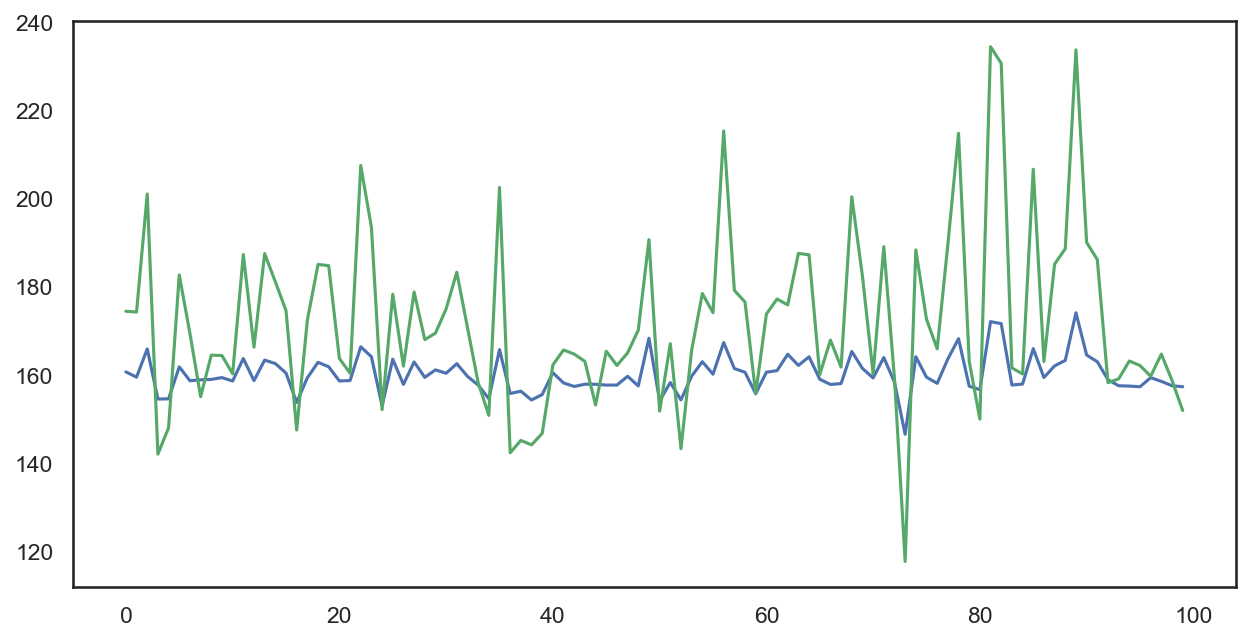

In [38]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(T_Predict[1900:2000],'-b')
plt.plot(T_Test[1900:2000],'-g')
plt.show()

Analysis 

I have selected carat,x,y,z to be the most significant features as seen in the correlation matrix and heatmap as seen in the data visualization section.

We can see that the rmse error is reduced from 1200 to 921 which confirms the significance of the selected features. In LMS model the weight is iteratively calculated and it depends on the previous data. As the weights are being calcualted iteratively the error is decreasing in LMS and not in LS because the calculation is not iterative.


Produce residual plots and observe the patterns for the goodness of fit

Text(0.5, 1.0, 'Residual Plot for Least Squares with Insignificant Features')

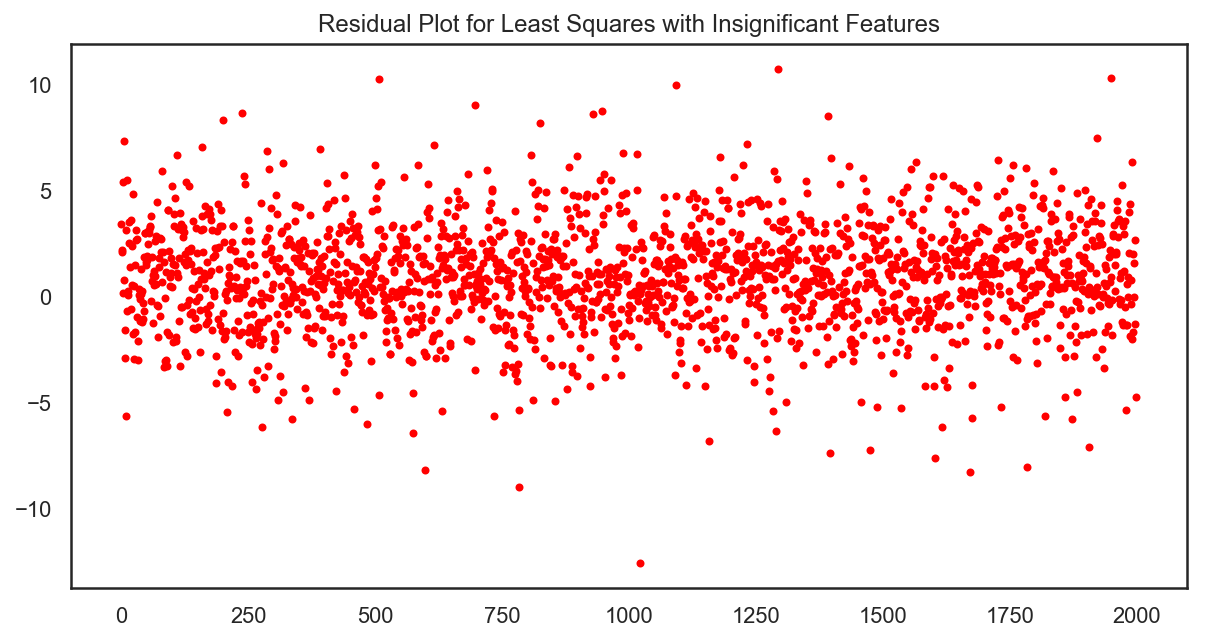

In [44]:
difference = T_Test - T_Predicted
number = np.arange(len(T_Test))
fig=plt.figure(figsize=(10, 5), dpi= 144, facecolor='w', edgecolor='k')
plt.scatter(number,difference,marker='.',color='red')
plt.title("Residual Plot for Least Squares with Insignificant Features")

Text(0.5, 1.0, 'Residual Plot for Least Mean Squares with Insignificant Features')

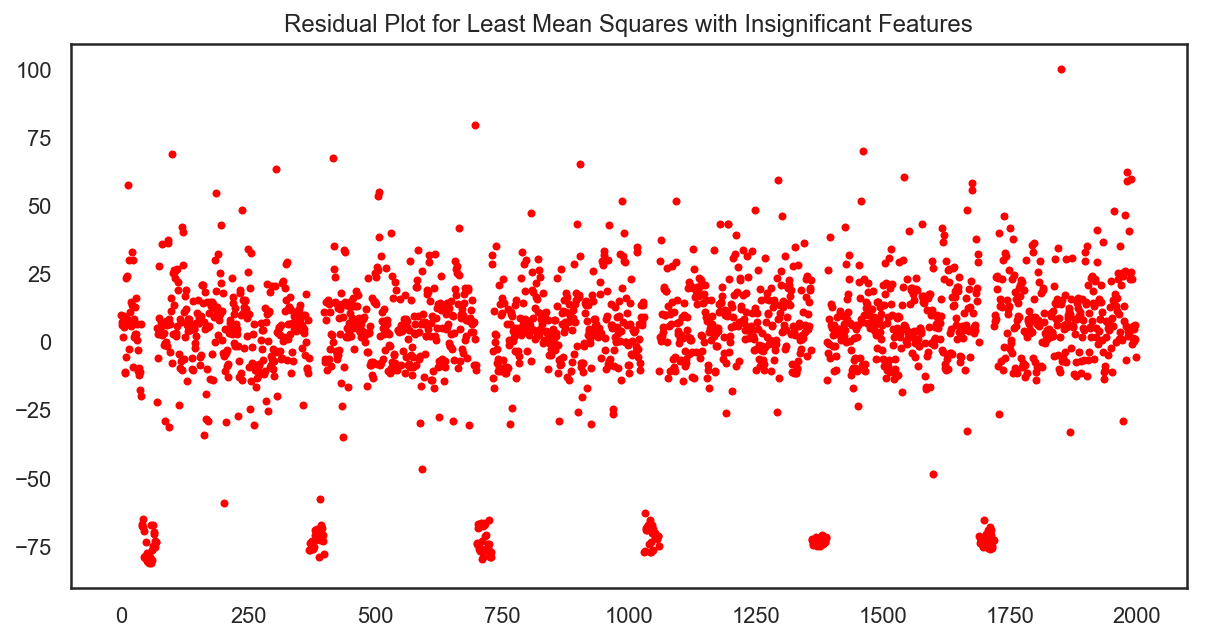

In [45]:
difference = T_Test - T_Predict
number = np.arange(len(T_Test))
fig=plt.figure(figsize=(10, 5), dpi= 144, facecolor='w', edgecolor='k')
plt.scatter(number,difference,marker='.',color='red')
plt.title("Residual Plot for Least Mean Squares with Insignificant Features")

Text(0.5, 1.0, 'Residual Plot for Least Squares without Insignificant Features')

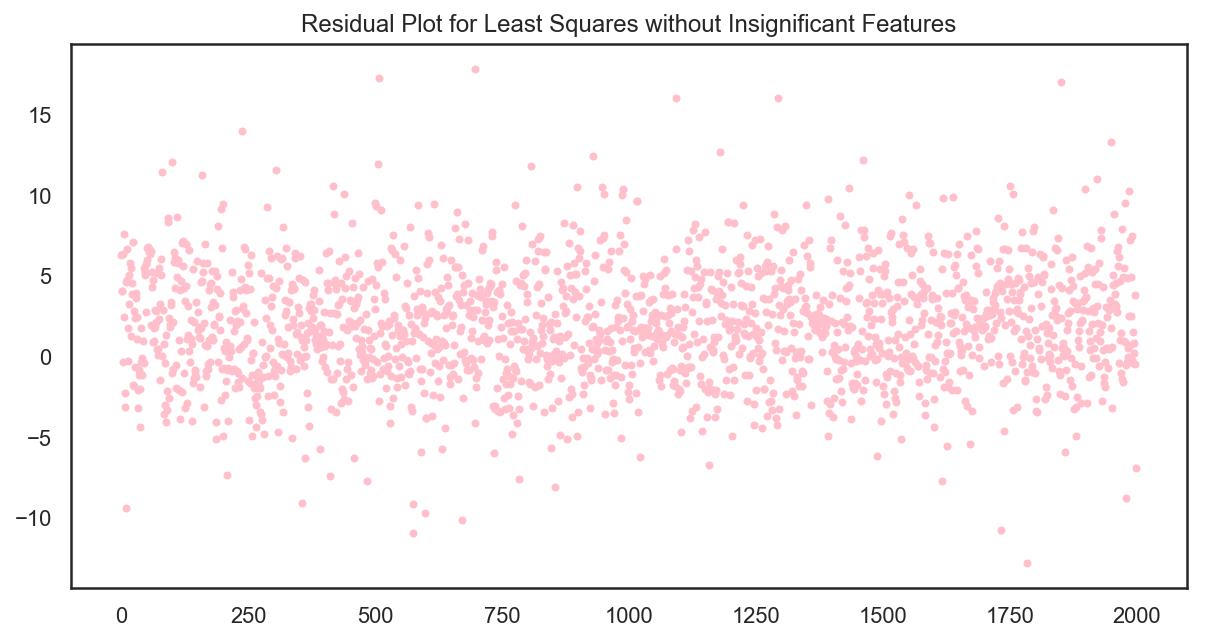

In [46]:
difference = T1_Test - T1_Predicted
number = np.arange(len(T1_Test))
fig=plt.figure(figsize=(10, 5), dpi= 144, facecolor='w', edgecolor='k')
plt.scatter(number,difference,marker='.',color='pink')
plt.title("Residual Plot for Least Squares without Insignificant Features")

Text(0.5, 1.0, 'Residual Plot for Least Mean Squares without Insignificant Features')

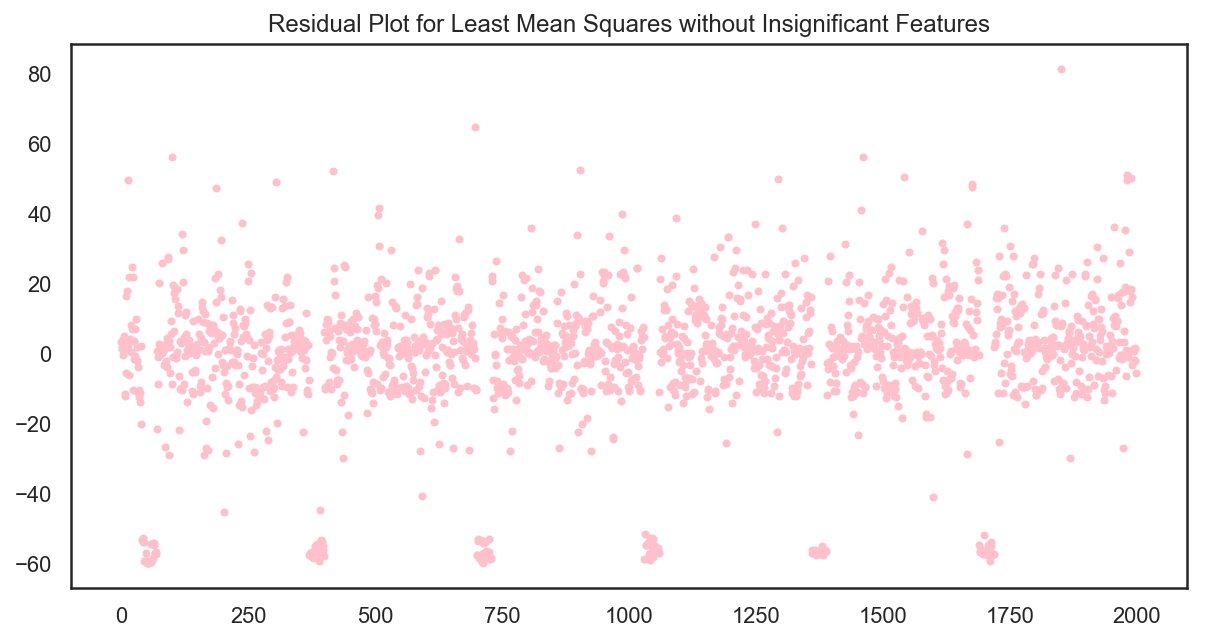

In [47]:
difference = T1_Test - T1_Predict
number = np.arange(len(T1_Test))
fig=plt.figure(figsize=(10, 5), dpi= 144, facecolor='w', edgecolor='k')
plt.scatter(number,difference,marker='.',color ='pink')
plt.title("Residual Plot for Least Mean Squares without Insignificant Features")

Analysis 

From the above residual plots we can see that when the insificant features are removed it doesnt affect the residual plots as they are insignificant features. 

Similarly we can see that the range of the resiudal plots in decreasing for the LMS residual plots which confirms that the significant features are really significant.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

In [43]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
